In [1]:
%matplotlib notebook

In [2]:
import os
import csv

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from microfaune.detection import RNNDetector
from microfaune import audio

/home/florent/.conda/envs/microfaune/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/florent/.conda/envs/microfaune/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/florent/.conda/envs/microfaune/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/florent/.conda/envs/microfaune/lib

# Load CiteU dataset

In [5]:
dataset_dir = "../../data/citeU_annotated/"

In [6]:
label_file = os.path.join(dataset_dir, "labels.csv")

In [7]:
wav_files = []
Y = []
with open(label_file, "r") as f:
    reader = csv.reader(f)
    next(reader)
    for name, lab in reader:
        wav_files.append(os.path.join(dataset_dir, "wav", f"{name}.wav"))
        Y.append(int(lab))
Y = np.array(Y)

# Prediction

In [8]:
model = RNNDetector()

In [10]:
scores = []
local_scores = []
for wav_file in wav_files:
    s, local_s = model.predict_on_wav(wav_file)
    scores.append(s[0])
    local_scores.append(local_s)
scores = np.array(scores)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
Y_hat = scores > 0.5

acc = np.mean(Y == Y_hat)

neg_ind = Y == 0
neg_acc = np.mean(Y[neg_ind] == Y_hat[neg_ind])

pos_ind = Y == 1
pos_acc = np.mean(Y[pos_ind] == Y_hat[pos_ind])

print(f"Accuracy: {100*acc:.2f}")
print(f"Accuracy on negative: {100*neg_acc:.2f}")
print(f"Accuracy on positive: {100*pos_acc:.2f}")

Accuracy: 89.66
Accuracy on negative: 92.52
Accuracy on positive: 79.15


In [20]:
Y_hat = scores > 0.3

acc = np.mean(Y == Y_hat)

neg_ind = Y == 0
neg_acc = np.mean(Y[neg_ind] == Y_hat[neg_ind])

pos_ind = Y == 1
pos_acc = np.mean(Y[pos_ind] == Y_hat[pos_ind])

print(f"Accuracy: {100*acc:.2f}")
print(f"Accuracy on negative: {100*neg_acc:.2f}")
print(f"Accuracy on positive: {100*pos_acc:.2f}")

Accuracy: 86.31
Accuracy on negative: 86.84
Accuracy on positive: 84.36


In [21]:
FP_inds = [i for i, (y, y_hat) in enumerate(zip(Y, Y_hat)) if (not y) and y_hat]
FN_inds = [i for i, (y, y_hat) in enumerate(zip(Y, Y_hat)) if y and (not y_hat)]

In [22]:
print(f"# FP: {len(FP_inds)}")
print(f"# FN: {len(FN_inds)}")

# FP: 102
# FN: 33


In [23]:
print("FALSE POSITIVE")
for i in FP_inds:
    print(os.path.basename(wav_files[i]))

FALSE POSITIVE
SWIFT_20190723_071011_1_0_neg_9.wav
SWIFT_20190723_071011_1_1_neg_0.wav
SWIFT_20190723_071011_1_1_neg_1.wav
SWIFT_20190723_071011_1_1_neg_2.wav
SWIFT_20190723_071011_1_1_neg_3.wav
SWIFT_20190723_071011_1_1_neg_4.wav
SWIFT_20190723_071011_1_1_neg_5.wav
SWIFT_20190723_071011_1_1_neg_7.wav
SWIFT_20190723_071011_1_1_neg_8.wav
SWIFT_20190723_071011_1_1_neg_9.wav
SWIFT_20190723_071011_1_2_neg_0.wav
SWIFT_20190723_071011_1_2_neg_2.wav
SWIFT_20190723_071011_1_2_neg_3.wav
SWIFT_20190723_071011_1_2_neg_4.wav
SWIFT_20190723_071011_1_2_neg_7.wav
SWIFT_20190723_071011_1_2_neg_8.wav
SWIFT_20190723_071011_1_2_neg_9.wav
SWIFT_20190723_071011_1_4_neg_1.wav
SWIFT_20190723_071011_1_4_neg_2.wav
SWIFT_20190723_071011_1_4_neg_4.wav
SWIFT_20190723_071011_1_4_neg_5.wav
SWIFT_20190723_072011_0_neg_0.wav
SWIFT_20190723_072011_1_neg_3.wav
SWIFT_20190723_072011_1_neg_6.wav
SWIFT_20190723_072011_1_neg_7.wav
SWIFT_20190723_072011_2_neg_0.wav
SWIFT_20190723_072011_2_neg_2.wav
SWIFT_20190723_072011_2_n

In [24]:
print("FALSE NEGATIVE")
for i in FN_inds:
    print(os.path.basename(wav_files[i]))

FALSE NEGATIVE
SWIFT_20190723_071011_1_4_pos_0.wav
SWIFT_20190723_072011_3_pos_0.wav
SWIFT_20190723_072011_3_pos_1.wav
SWIFT_20190723_072011_3_pos_2.wav
SWIFT_20190723_072011_3_pos_3.wav
SWIFT_20190723_072011_9_pos_1.wav
SWIFT_20190723_073011_1_2_pos_0.wav
SWIFT_20190723_073011_1_3_pos_1.wav
SWIFT_20190723_073011_1_4_pos_1.wav
SWIFT_20190723_073011_1_4_pos_2.wav
SWIFT_20190723_073011_1_4_pos_3.wav
SWIFT_20190723_073011_2_1_pos_0.wav
SWIFT_20190723_073011_2_1_pos_1.wav
SWIFT_20190723_073011_2_2_pos_0.wav
SWIFT_20190723_073011_2_2_pos_2.wav
SWIFT_20190723_074012_1_0_pos_0.wav
SWIFT_20190723_074012_1_0_pos_1.wav
SWIFT_20190723_074012_1_0_pos_3.wav
SWIFT_20190723_074012_1_1_pos_1.wav
SWIFT_20190723_074012_1_1_pos_3.wav
SWIFT_20190723_074012_2_0_pos_1.wav
SWIFT_20190723_074012_2_1_pos_1.wav
SWIFT_20190723_074012_2_1_pos_3.wav
SWIFT_20190723_075012_1_1_pos_0.wav
SWIFT_20190723_075012_1_1_pos_1.wav
SWIFT_20190723_075012_1_1_pos_2.wav
SWIFT_20190723_075012_1_1_pos_3.wav
SWIFT_20190725_075011_1

# Check errors

In [25]:
import IPython.display as ipd
from glob import glob

from sklearn.metrics import roc_curve, auc

from microfaune.audio import load_wav
import librosa.display

In [26]:
def check_result(wav_file, y, pred_score, local_score):
    sr, audio = load_wav(wav_file)
    plt.figure(figsize=(9, 6))
    label_dict = {0: "Negative", 1: "Positive"}
    plt.suptitle(f"UID: '{os.path.basename(wav_file)}', "
                 f"{label_dict[y]} example, "
                 f" predicted score: {pred_score:.2f}")

    plt.subplot(3, 1, 1)
    plt.title("Audio wave")
    librosa.display.waveplot(audio, sr)

    plt.subplot(3, 1, 2)
    plt.title("MEL spectrogram")
    x = model.compute_features([audio])[0]
    librosa.display.specshow(np.rot90(x.squeeze(), -1))

    plt.subplot(3, 1, 3)
    plt.title("Local prediction")
    ax = plt.gca()
    ax.set_xlim(0, len(local_score))
    ax.set_ylim(-0.05, 1.05)
    plt.plot(local_score)
    return ipd.Audio(wav_file)

<IPython.core.display.Javascript object>


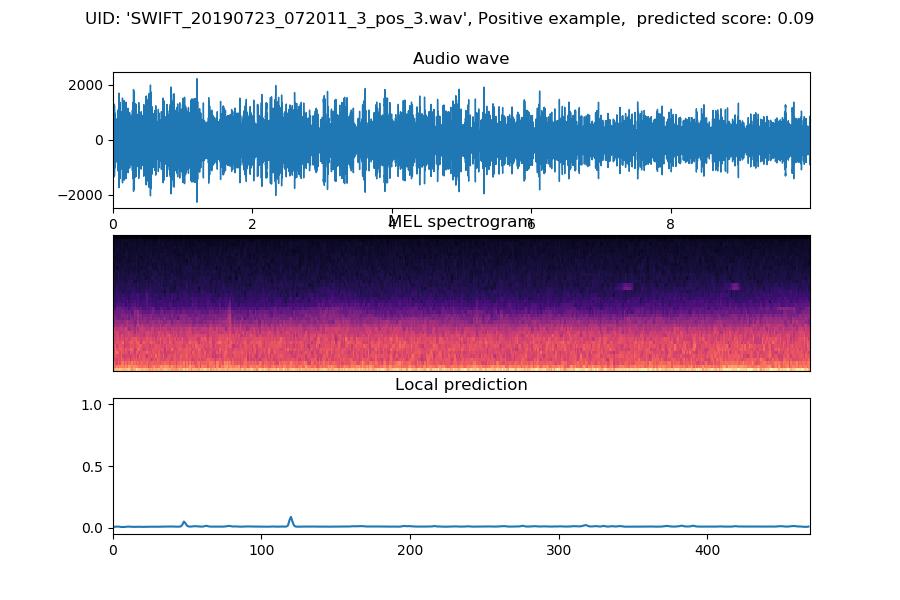

In [27]:
ind = FN_inds[4]
check_result(wav_files[ind], Y[ind], scores[ind], local_scores[ind])

<IPython.core.display.Javascript object>


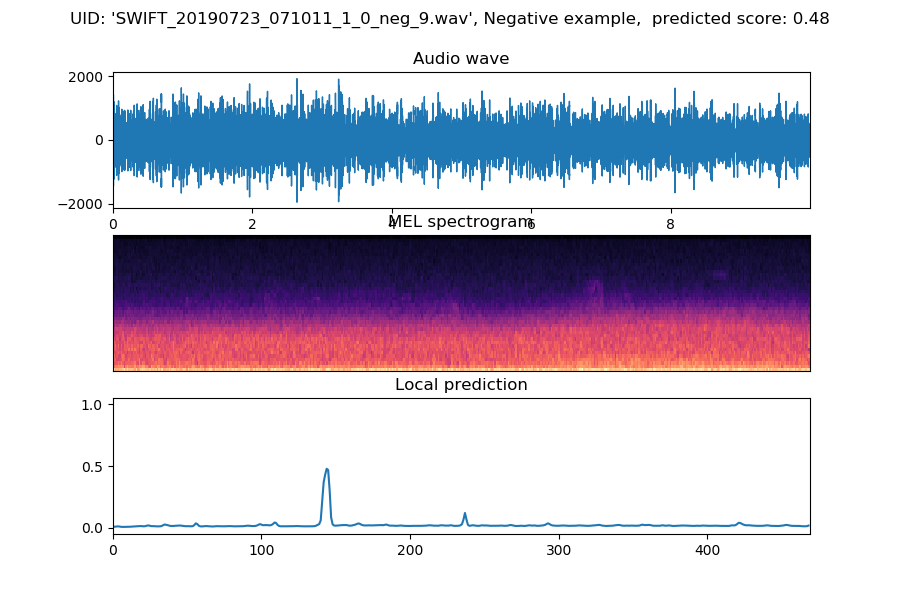

In [29]:
ind = FP_inds[0]
check_result(wav_files[ind], Y[ind], scores[ind], local_scores[ind])